# Proyek Analisis Sentimen Komentar Film




## 1. Persiapan Lingkungan dan Impor Data

In [8]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import os

# Mengunduh stop words bahasa Indonesia jika belum ada
try:
    stopwords_id = stopwords.words('indonesian')
except:
    nltk.download('stopwords')
    stopwords_id = stopwords.words('indonesian')

# Membaca keempat file CSV
# Pastikan Anda telah menyesuaikan path file jika diperlukan
try:
    df_animasi = pd.read_csv('Merged/animasi_merged.csv')
    df_drama = pd.read_csv('Merged/drama_merged.csv')
    df_horor = pd.read_csv('Merged/horor_merged.csv')
    df_komedi = pd.read_csv('Merged/komedi_merged.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Pastikan file CSV berada di lokasi yang benar.")
    exit()

# Menambahkan kolom 'genre' ke setiap DataFrame
df_animasi['genre'] = 'animasi'
df_drama['genre'] = 'drama'
df_horor['genre'] = 'horor'
df_komedi['genre'] = 'komedi'

# Menggabungkan ketiga DataFrame menjadi satu
df = pd.concat([df_animasi, df_drama, df_horor, df_komedi], ignore_index=True)

print("### Data Asli (5 Baris Pertama):")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

### Data Asli (5 Baris Pertama):
| Link Channel                                 | ID Channel           | Waktu                      | Link video                                                                                    | Komentar                                                                                                                                                                                                                                                                                                                         | Like   | genre   | dot 2   | Like.1   |
|:---------------------------------------------|:---------------------|:---------------------------|:----------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Preprocessing Data


In [9]:
df

,Link Channel,ID Channel,Waktu,Link video,Komentar,Like,genre,dot 2,Like.1
0,https://www.youtube.com/@iamblueyork,@iamblueyork,4 bulan yang lalu,https://www.youtube.com/watch?v=b4Lrqeiones&lc...,Walaupun genre animasi tp ttp mempertahankan P...,19.0,animasi,NaN,NaN
1,https://www.youtube.com/@ferdausalamsyah1600,@ferdausalamsyah1600,4 bulan yang lalu,https://www.youtube.com/watch?v=b4Lrqeiones&lc...,Ryan Adriandi sengaja ngecast anak kecil untuk...,39.0,animasi,NaN,NaN
2,https://www.youtube.com/@liopleurodoon,@liopleurodoon,4 bulan yang lalu (diedit),https://www.youtube.com/watch?v=b4Lrqeiones&lc...,Anak2 di film ini keluarganya nggak ada yang l...,66.0,animasi,NaN,NaN
3,https://www.youtube.com/@RezaNovembriGame,@RezaNovembriGame,4 bulan yang lalu,https://www.youtube.com/watch?v=b4Lrqeiones&lc...,"tapi karena memang layak, untuk di tonton ini ...",69.0,animasi,NaN,NaN
4,https://www.youtube.com/@clondoijo,@clondoijo,4 bulan yang lalu,https://www.youtube.com/watch?v=b4Lrqeiones&lc...,"penasaran dg film ni,akhirnya tadi siang nonto...",24.0,animasi,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1918,https://www.youtube.com/@mryanrivansyah86,@mryanrivansyah86,1 tahun yang lalu,https://www.youtube.com/watch?v=UUzM1-C6zCU&lc...,undang coach justin bang,NaN,komedi,NaN,NaN
1919,https://www.youtube.com/@rickypratama26,@rickypratama26,8 bulan yang lalu,https://www.youtube.com/watch?v=UUzM1-C6zCU&lc...,Baru tau kalo gara2 warisan di sutradarai acho...,1.0,komedi,NaN,NaN
1920,https://www.youtube.com/@ahmadzakikarim,@ahmadzakikarim,1 tahun yang lalu,https://www.youtube.com/watch?v=UUzM1-C6zCU&lc...,Bang kenapa durasinya lbih pendek dibanding yg...,NaN,komedi,NaN,NaN
1921,https://www.youtube.com/@Belverously,@Belverously,1 tahun yang lalu (diedit),https://www.youtube.com/watch?v=UUzM1-C6zCU&lc...,"Acho, tapi berasa achok",2.0,komedi,NaN,NaN


In [10]:
df = pd.DataFrame(df[['ID Channel', 'Waktu', 'Komentar', 'genre', 'Like']])
df

,ID Channel,Waktu,Komentar,genre,Like
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0
...,...,...,...,...,...
1918,@mryanrivansyah86,1 tahun yang lalu,undang coach justin bang,komedi,NaN
1919,@rickypratama26,8 bulan yang lalu,Baru tau kalo gara2 warisan di sutradarai acho...,komedi,1.0
1920,@ahmadzakikarim,1 tahun yang lalu,Bang kenapa durasinya lbih pendek dibanding yg...,komedi,NaN
1921,@Belverously,1 tahun yang lalu (diedit),"Acho, tapi berasa achok",komedi,2.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID Channel  1761 non-null   object
 1   Waktu       1903 non-null   object
 2   Komentar    1910 non-null   object
 3   genre       1923 non-null   object
 4   Like        1405 non-null   object
dtypes: object(5)
memory usage: 75.2+ KB


HAPUS DUPLIKAT

In [12]:
df.drop_duplicates(subset='Komentar', keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1907 entries, 0 to 1922
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID Channel  1745 non-null   object
 1   Waktu       1887 non-null   object
 2   Komentar    1906 non-null   object
 3   genre       1907 non-null   object
 4   Like        1395 non-null   object
dtypes: object(5)
memory usage: 89.4+ KB


WORDCLOUD BEFORE PREPROC.

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

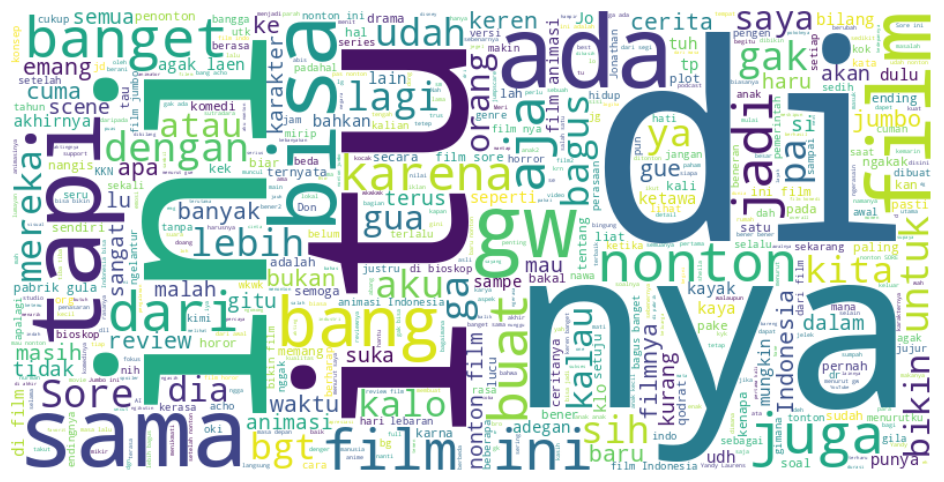

In [14]:
# Pastikan kolom 'Komentar' tidak ada NaN
df['Komentar'] = df['Komentar'].fillna('')

# Gabungkan semua teks jadi satu string
text = " ".join(df['Komentar'].astype(str).tolist())

# Tambahkan stopwords khusus (kata yang mau diabaikan)
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'yang', 'dan', 'yg'])

# Buat WordCloud
wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
)

# Generate dari text
wc.generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

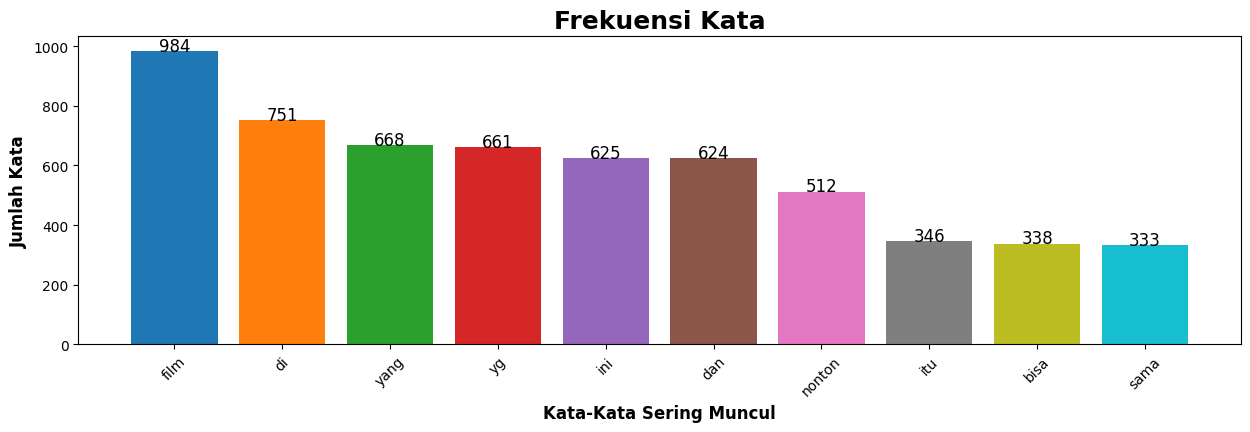

In [15]:

from collections import Counter

# Gabungkan semua teks dalam kolom 'Komentar'
komentar = " ".join(df["Komentar"])

# Tokenisasi kata (split berdasarkan spasi)
tokens = text.split()

# Hitung frekuensi kata
word_counts = Counter(tokens)

# Ambil 10 kata paling sering muncul
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

# Pilih warna berbeda untuk tiap bar
colors = plt.cm.tab10(range(len(words)))

# Plot bar chart
plt.figure(figsize=(15, 4))
bars = plt.bar(words, counts, color=colors)

# Tambahkan label dan judul
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan angka di atas setiap bar
for bar, num in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        num + 1,
        str(num),
        fontsize=12,
        color='black',
        ha='center'
    )

# Tampilkan grafik
plt.show()


CLEANING

In [16]:
import re
import string
import nltk

# ==============================
# Fungsi untuk membersihkan teks
# ==============================

# 1. Hapus emoji
def remove_emoji(text):
    if text is not None and isinstance(text, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # geometric shapes extended
            u"\U0001F800-\U0001F8FF"  # supplemental arrows-C
            u"\U0001F900-\U0001F9FF"  # supplemental symbols & pictographs
            u"\U0001FA00-\U0001FA6F"  # chess symbols
            u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
            u"\U00002702-\U000027B0"  # dingbats
            u"\U000024C2-\U0001F251"  # enclosed characters
            "]+", flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', text)
    return text

# 2. Hapus simbol (selain huruf/angka/spasi)
def remove_symbols(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'[^A-Za-z0-9\s]', '', text)  # hapus simbol
    return text

# 3. Hapus angka
def remove_numbers(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'\d+', '', text)  # hapus angka
    return text

# 4. Hapus username (@username)
def remove_username(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@[^\s]+', '', text)  # hapus mention
    return text

# ==================================
# Terapkan fungsi ke dataframe 'df'
# ==================================

df['cleaning'] = df['Komentar'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

# Cek hasil 5 data pertama
df.head(5)


,ID Channel,Waktu,Komentar,genre,Like,cleaning
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0,Walaupun genre animasi tp ttp mempertahankan P...
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0,Ryan Adriandi sengaja ngecast anak kecil untuk...
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0,Anak di film ini keluarganya nggak ada yang le...
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0,tapi karena memang layak untuk di tonton ini f...
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0,penasaran dg film niakhirnya tadi siang nonton...


CASE FOLDING

In [17]:
# Fungsi Case Folding (ubah teks jadi huruf kecil semua)
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

# Terapkan fungsi case folding ke kolom 'cleaning'
df['case_folding'] = df['cleaning'].apply(case_folding)

# Lihat 5 baris pertama
df.head(5)


,ID Channel,Waktu,Komentar,genre,Like,cleaning,case_folding
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0,Walaupun genre animasi tp ttp mempertahankan P...,walaupun genre animasi tp ttp mempertahankan p...
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0,Ryan Adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0,Anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya nggak ada yang le...
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0,penasaran dg film niakhirnya tadi siang nonton...,penasaran dg film niakhirnya tadi siang nonton...


NORMALISASI KATA

In [18]:
# from google.colab import files
# files.upload()  # pilih kaggle.json


In [19]:
# !pip install kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d fornigulo/kamus-slag
# !unzip kamus-slag.zip


In [20]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)
            else:
                replaced_words.append(word)

        replaced_text = " ".join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        return text, [], [], []


In [21]:
df.columns

Index(['ID Channel', 'Waktu', 'Komentar', 'genre', 'Like', 'cleaning',
       'case_folding'],
      dtype='object')

In [22]:
# Baca dataset
data = pd.DataFrame(df[['ID Channel', 'Waktu', 'Komentar', 'genre', 'Like', 'cleaning',
       'case_folding']])
data.head(5)


,ID Channel,Waktu,Komentar,genre,Like,cleaning,case_folding
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0,Walaupun genre animasi tp ttp mempertahankan P...,walaupun genre animasi tp ttp mempertahankan p...
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0,Ryan Adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0,Anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya nggak ada yang le...
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0,penasaran dg film niakhirnya tadi siang nonton...,penasaran dg film niakhirnya tadi siang nonton...


In [25]:
# Baca kamus kata baku
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

kamus_data.head()

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [26]:
# Terapkan fungsi penggantian kata tidak baku
data['hasil_normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = \
    zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# Lihat 100 data teratas
#data.head(100)

# Buat dataframe baru dengan kolom yang relevan
df = pd.DataFrame(
    data[['ID Channel', 'Waktu', 'Komentar', 'genre', 'Like', 'cleaning',
       'case_folding', 'hasil_normalisasi']]
)

df.head(5)


,ID Channel,Waktu,Komentar,genre,Like,cleaning,case_folding,hasil_normalisasi
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0,Walaupun genre animasi tp ttp mempertahankan P...,walaupun genre animasi tp ttp mempertahankan p...,walaupun genre animasi tapi tetap mempertahank...
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0,Ryan Adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0,Anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya tidak ada yang le...
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0,penasaran dg film niakhirnya tadi siang nonton...,penasaran dg film niakhirnya tadi siang nonton...,penasaran dengan film niakhirnya tadi siang me...


TOKENIZATION

In [27]:
# Fungsi untuk melakukan tokenisasi (memecah kalimat jadi kata-kata)
def tokenize(text):
    tokens = text.split()   # pecah string berdasarkan spasi
    return tokens

# Terapkan fungsi tokenize pada kolom hasil normalisasi
df['tokenize'] = df['hasil_normalisasi'].apply(tokenize)

# Lihat 5 data pertama
df.head(5)


,ID Channel,Waktu,Komentar,genre,Like,cleaning,case_folding,hasil_normalisasi,tokenize
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0,Walaupun genre animasi tp ttp mempertahankan P...,walaupun genre animasi tp ttp mempertahankan p...,walaupun genre animasi tapi tetap mempertahank...,"[walaupun, genre, animasi, tapi, tetap, memper..."
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0,Ryan Adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...,"[ryan, adriandi, sengaja, ngecast, anak, kecil..."
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0,Anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya tidak ada yang le...,"[anak, di, film, ini, keluarganya, tidak, ada,..."
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...,"[tapi, karena, memang, layak, untuk, di, tonto..."
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0,penasaran dg film niakhirnya tadi siang nonton...,penasaran dg film niakhirnya tadi siang nonton...,penasaran dengan film niakhirnya tadi siang me...,"[penasaran, dengan, film, niakhirnya, tadi, si..."


PROSES STOPWORD REMOVAL

In [28]:
# Import stopwords dari NLTK
from nltk.corpus import stopwords
import nltk

# Download stopwords (hanya perlu sekali saja)
nltk.download('stopwords')

# Ambil stopwords bahasa Indonesia
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Terapkan stopword removal ke kolom tokenize
df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

# Lihat hasil 5 data pertama
df.head(5)


,ID Channel,Waktu,Komentar,genre,Like,cleaning,case_folding,hasil_normalisasi,tokenize,stopword_removal
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0,Walaupun genre animasi tp ttp mempertahankan P...,walaupun genre animasi tp ttp mempertahankan p...,walaupun genre animasi tapi tetap mempertahank...,"[walaupun, genre, animasi, tapi, tetap, memper...","[genre, animasi, mempertahankan, pop, culture,..."
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0,Ryan Adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...,"[ryan, adriandi, sengaja, ngecast, anak, kecil...","[ryan, adriandi, sengaja, ngecast, anak, energ..."
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0,Anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya tidak ada yang le...,"[anak, di, film, ini, keluarganya, tidak, ada,...","[anak, film, keluarganya, lengkap, tinggal, ne..."
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...,"[tapi, karena, memang, layak, untuk, di, tonto...","[layak, tonton, film, gue, bangga, pendongkrak..."
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0,penasaran dg film niakhirnya tadi siang nonton...,penasaran dg film niakhirnya tadi siang nonton...,penasaran dengan film niakhirnya tadi siang me...,"[penasaran, dengan, film, niakhirnya, tadi, si...","[penasaran, film, niakhirnya, siang, menonton,..."


🔹 STEMMING (Steaming Data)

In [30]:
# Install library Sastrawi (jika belum terinstall)
# !pip install Sastrawi

# Import library untuk stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [31]:
# Fungsi untuk stemming
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# Terapkan stemming ke kolom stopword_removal
df['stemming_data'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))

# Lihat hasil 5 data pertama
df.head(5)

,ID Channel,Waktu,Komentar,genre,Like,cleaning,case_folding,hasil_normalisasi,tokenize,stopword_removal,stemming_data
0,@iamblueyork,4 bulan yang lalu,Walaupun genre animasi tp ttp mempertahankan P...,animasi,19.0,Walaupun genre animasi tp ttp mempertahankan P...,walaupun genre animasi tp ttp mempertahankan p...,walaupun genre animasi tapi tetap mempertahank...,"[walaupun, genre, animasi, tapi, tetap, memper...","[genre, animasi, mempertahankan, pop, culture,...",genre animasi tahan pop culture hantu
1,@ferdausalamsyah1600,4 bulan yang lalu,Ryan Adriandi sengaja ngecast anak kecil untuk...,animasi,39.0,Ryan Adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...,ryan adriandi sengaja ngecast anak kecil untuk...,"[ryan, adriandi, sengaja, ngecast, anak, kecil...","[ryan, adriandi, sengaja, ngecast, anak, energ...",ryan adriandi sengaja ngecast anak energi anak
2,@liopleurodoon,4 bulan yang lalu (diedit),Anak2 di film ini keluarganya nggak ada yang l...,animasi,66.0,Anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya nggak ada yang le...,anak di film ini keluarganya tidak ada yang le...,"[anak, di, film, ini, keluarganya, tidak, ada,...","[anak, film, keluarganya, lengkap, tinggal, ne...",anak film keluarga lengkap tinggal nenek kakek...
3,@RezaNovembriGame,4 bulan yang lalu,"tapi karena memang layak, untuk di tonton ini ...",animasi,69.0,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...,tapi karena memang layak untuk di tonton ini f...,"[tapi, karena, memang, layak, untuk, di, tonto...","[layak, tonton, film, gue, bangga, pendongkrak...",layak tonton film gue bangga dongkrak film ani...
4,@clondoijo,4 bulan yang lalu,"penasaran dg film ni,akhirnya tadi siang nonto...",animasi,24.0,penasaran dg film niakhirnya tadi siang nonton...,penasaran dg film niakhirnya tadi siang nonton...,penasaran dengan film niakhirnya tadi siang me...,"[penasaran, dengan, film, niakhirnya, tadi, si...","[penasaran, film, niakhirnya, siang, menonton,...",penasaran film niakhirnya siang tonton ber org...


Hapus NAN

In [32]:
# Cek informasi dataset sebelum dibersihkan
print("Sebelum hapus NaN:")
df.isna().sum()



Sebelum hapus NaN:


ID Channel           162
Waktu                 20
Komentar               0
genre                  0
Like                 512
cleaning               0
case_folding           0
hasil_normalisasi      0
tokenize               0
stopword_removal       0
stemming_data          0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1907 entries, 0 to 1922
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Channel         1745 non-null   object
 1   Waktu              1887 non-null   object
 2   Komentar           1907 non-null   object
 3   genre              1907 non-null   object
 4   Like               1395 non-null   object
 5   cleaning           1907 non-null   object
 6   case_folding       1907 non-null   object
 7   hasil_normalisasi  1907 non-null   object
 8   tokenize           1907 non-null   object
 9   stopword_removal   1907 non-null   object
 10  stemming_data      1907 non-null   object
dtypes: object(11)
memory usage: 178.8+ KB


In [34]:
# Hapus data yang bernilai NaN
data = df.fillna(0)

# Cek lagi setelah pembersihan
print("\nSetelah hapus NaN:")
data.isna().sum()



Setelah hapus NaN:


ID Channel           0
Waktu                0
Komentar             0
genre                0
Like                 0
cleaning             0
case_folding         0
hasil_normalisasi    0
tokenize             0
stopword_removal     0
stemming_data        0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1907 entries, 0 to 1922
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Channel         1907 non-null   object
 1   Waktu              1907 non-null   object
 2   Komentar           1907 non-null   object
 3   genre              1907 non-null   object
 4   Like               1907 non-null   object
 5   cleaning           1907 non-null   object
 6   case_folding       1907 non-null   object
 7   hasil_normalisasi  1907 non-null   object
 8   tokenize           1907 non-null   object
 9   stopword_removal   1907 non-null   object
 10  stemming_data      1907 non-null   object
dtypes: object(11)
memory usage: 178.8+ KB


WORDCLOUD AFTER PREPROC.

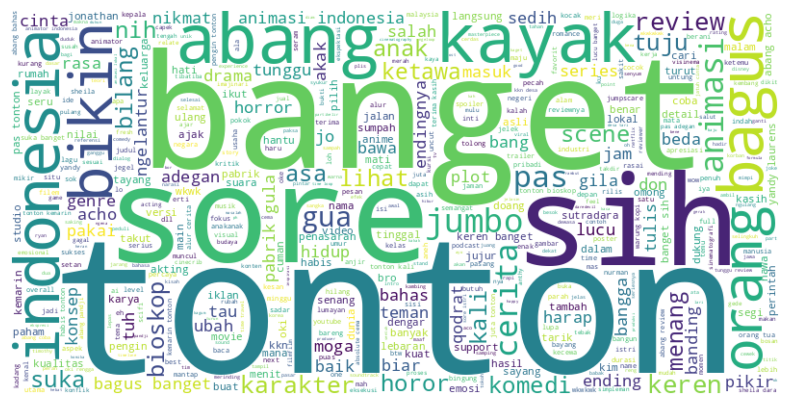

In [36]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'steming_data'
text = " ".join(data['stemming_data'].astype(str).tolist())

# Tambahan stopwords agar hasil lebih bersih
stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh',
    'fyp', 'ya', 'gue', 'kak', 'film'
])

# Membuat WordCloud
wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
)

# Generate WordCloud
wc.generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


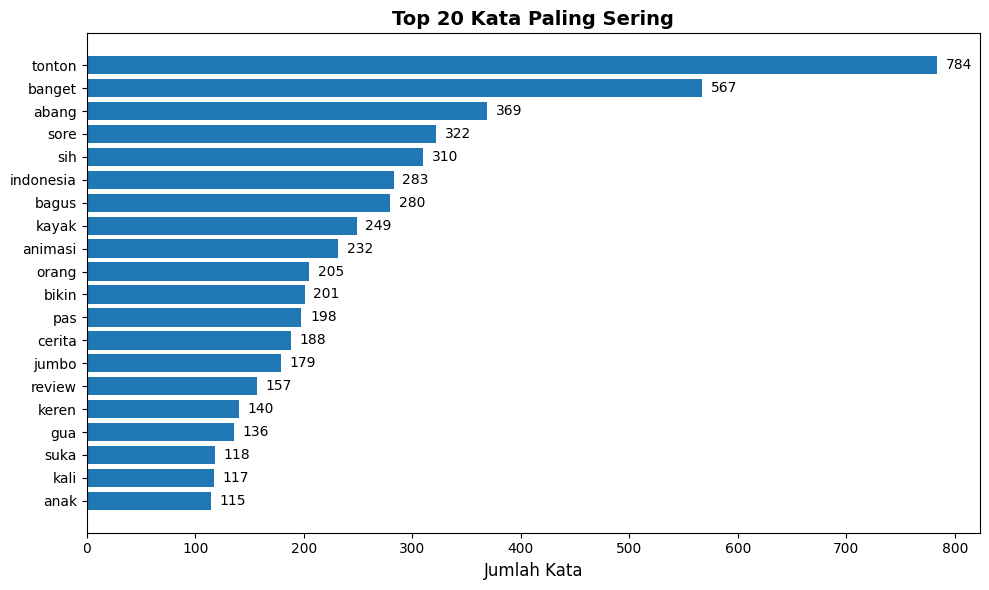

In [37]:
import re
from collections import Counter
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Gabungkan teks dari kolom hasil stemming
text = " ".join(df["stemming_data"].astype(str).tolist())

# Stopwords dasar + tambahan slang/umum
stopwords = set(STOPWORDS)
stopwords.update([
    "https", "co", "rt", "...", "amp", "lu", "deh", "fyp", "ya", "gue", "kak", 'film'
    ])

# Tokenisasi sederhana + lower + hanya huruf
tokens = re.findall(r"[a-zA-Z]+", text.lower())
tokens = [w for w in tokens if w not in stopwords and len(w) > 1]

# Hitung frekuensi & ambil Top-N
N = 20
counts = Counter(tokens)
top_words = counts.most_common(N)

# Pecah jadi dua list (kata & jumlah)
if top_words:
    words, freqs = zip(*top_words)
else:
    words, freqs = [], []

# Plot (pakai barh biar label kebaca)
plt.figure(figsize=(10, 6))
bars = plt.barh(list(words)[::-1], list(freqs)[::-1])
plt.xlabel("Jumlah Kata", fontsize=12)
plt.title(f"Top {N} Kata Paling Sering", fontsize=14, fontweight="bold")

# Tambahkan angka di ujung bar
for bar, val in zip(bars, list(freqs)[::-1]):
    plt.text(bar.get_width() + max(freqs)*0.01, bar.get_y() + bar.get_height()/2,
             str(val), va="center", fontsize=10)

plt.tight_layout()
plt.show()


In [38]:
# Simpan hasil preprocessing ke file CSV
data.to_csv(
    "Hasil_Preprocessing_Data.csv",
    encoding="utf-8",
    index=False
)

print("✅ File berhasil disimpan sebagai 'Hasil_Preprocessing_Data.csv'")


✅ File berhasil disimpan sebagai 'Hasil_Preprocessing_Data.csv'


## 3.  Labeling Data Using the Inset Lexicon Based Method for 3 and 2 Classifications

### 3 kelas

In [39]:
import pandas as pd

# Baca hasil preprocessing yang sudah disimpan
data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Channel         1907 non-null   object
 1   Waktu              1907 non-null   object
 2   Komentar           1906 non-null   object
 3   genre              1907 non-null   object
 4   Like               1907 non-null   object
 5   cleaning           1905 non-null   object
 6   case_folding       1905 non-null   object
 7   hasil_normalisasi  1905 non-null   object
 8   tokenize           1907 non-null   object
 9   stopword_removal   1907 non-null   object
 10  stemming_data      1904 non-null   object
dtypes: object(11)
memory usage: 164.0+ KB


In [40]:
data = pd.DataFrame(data[['genre', 'Like','stemming_data']])
data.head(5)

,genre,Like,stemming_data
0,animasi,19.0,genre animasi tahan pop culture hantu
1,animasi,39.0,ryan adriandi sengaja ngecast anak energi anak
2,animasi,66.0,anak film keluarga lengkap tinggal nenek kakek...
3,animasi,69.0,layak tonton film gue bangga dongkrak film ani...
4,animasi,24.0,penasaran film niakhirnya siang tonton ber org...


In [41]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"

# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'Sentiment']] = data['stemming_data'].apply(
    lambda x: pd.Series(determine_sentiment(x))
)

# Tampilkan hasilnya
data.head(5)


,genre,Like,stemming_data,Score,Sentiment
0,animasi,19.0,genre animasi tahan pop culture hantu,1,Positif
1,animasi,39.0,ryan adriandi sengaja ngecast anak energi anak,-2,Negatif
2,animasi,66.0,anak film keluarga lengkap tinggal nenek kakek...,-1,Negatif
3,animasi,69.0,layak tonton film gue bangga dongkrak film ani...,4,Positif
4,animasi,24.0,penasaran film niakhirnya siang tonton ber org...,-1,Negatif


C:\Users\DELL\AppData\Local\Temp\ipykernel_9672\105096082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


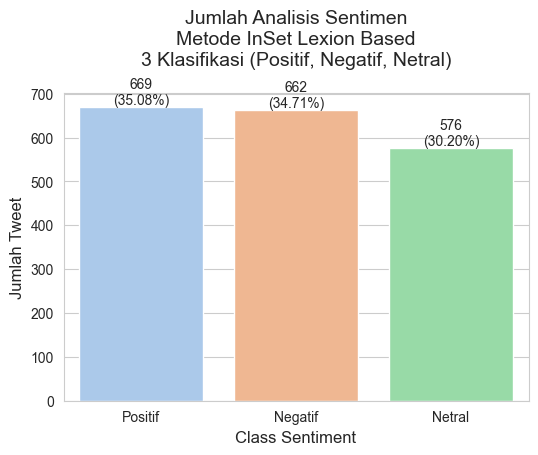

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title("Jumlah Analisis Sentimen\nMetode InSet Lexion Based\n3 Klasifikasi (Positif, Negatif, Netral)", fontsize=14, pad=20)
plt.xlabel("Class Sentiment", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f"{100 * count / total:.2f}%"
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()


In [43]:
df_final = pd.concat([df, data], ignore_index=True)

In [44]:
# Simpan hasil preprocessing ke file CSV
data.to_csv(
    "Hasil_Labelling_Data_3class.csv",
    encoding="utf-8",
    index=False
)

print("✅ File berhasil disimpan sebagai 'Hasil_Labelling_Data_3class.csv'")


✅ File berhasil disimpan sebagai 'Hasil_Labelling_Data_3class.csv'


## 4. Pelatihan dan Evaluasi Model

In [45]:
import pandas as pd


In [46]:
df = pd.read_csv("Hasil_Labelling_Data_3class.csv")
df.head(5)


,genre,Like,stemming_data,Score,Sentiment
0,animasi,19.0,genre animasi tahan pop culture hantu,1,Positif
1,animasi,39.0,ryan adriandi sengaja ngecast anak energi anak,-2,Negatif
2,animasi,66.0,anak film keluarga lengkap tinggal nenek kakek...,-1,Negatif
3,animasi,69.0,layak tonton film gue bangga dongkrak film ani...,4,Positif
4,animasi,24.0,penasaran film niakhirnya siang tonton ber org...,-1,Negatif


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [48]:
# Membagi data menjadi fitur (X) dan target (y)
X = df['stemming_data']
y = df['Sentiment']
X

0                   genre animasi tahan pop culture hantu
1          ryan adriandi sengaja ngecast anak energi anak
2       anak film keluarga lengkap tinggal nenek kakek...
3       layak tonton film gue bangga dongkrak film ani...
4       penasaran film niakhirnya siang tonton ber org...
                              ...                        
1902                            undang coach justin abang
1903    tau gara waris sutradara acho bagus banget sih...
1904                    abang durasi pendek banding laiin
1905                                       acho asa achok
1906                                      radit ajar acho
Name: stemming_data, Length: 1907, dtype: object

In [49]:
y

0       Positif
1       Negatif
2       Negatif
3       Positif
4       Negatif
         ...   
1902    Positif
1903    Negatif
1904     Netral
1905     Netral
1906     Netral
Name: Sentiment, Length: 1907, dtype: object

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree = DecisionTreeClassifier(random_state=42)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membagi data menjadi fitur (X) dan target (y)
X = df['stemming_data']
y = df['Sentiment']

# Fill NaN values in X with empty strings
X = X.fillna('')

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Vektorisasi teks
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_vec, y_train)

# Memprediksi sentimen pada data pengujian
y_pred_dtree = dtree.predict(X_test_vec)

print("\n### Laporan Klasifikasi Model Decision Tree:")
print(classification_report(y_test, y_pred_dtree))

print("### Akurasi Model Decision Tree:", accuracy_score(y_test, y_pred_dtree))


### Laporan Klasifikasi Model Decision Tree:
              precision    recall  f1-score   support

     Negatif       0.66      0.64      0.65       199
      Netral       0.59      0.57      0.58       173
     Positif       0.65      0.69      0.67       201

    accuracy                           0.64       573
   macro avg       0.63      0.63      0.63       573
weighted avg       0.64      0.64      0.64       573

### Akurasi Model Decision Tree: 0.6369982547993019


## 5. arch



In [54]:
# Membagi data menjadi fitur (X) dan target (y)
X = df['stemming_data']
y = df['Sentiment']

# Fill NaN values in X with empty strings
X = X.fillna('')

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vektorisasi teks
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Memprediksi sentimen pada data pengujian
y_pred = model.predict(X_test_vec)

print("\n### Laporan Klasifikasi Model:")
print(classification_report(y_test, y_pred))

print("### Akurasi Model:", accuracy_score(y_test, y_pred))


### Laporan Klasifikasi Model:
              precision    recall  f1-score   support

     Negatif       0.61      0.70      0.66       134
      Netral       0.67      0.21      0.33       121
     Positif       0.55      0.82      0.66       127

    accuracy                           0.59       382
   macro avg       0.61      0.58      0.55       382
weighted avg       0.61      0.59      0.55       382

### Akurasi Model: 0.5863874345549738


In [55]:
output_filename = 'analisis_sentimen_komentar_final.csv'
df.to_csv(output_filename, index=False)
print(f"\nDataFrame yang sudah diproses disimpan ke dalam file: {output_filename}")


DataFrame yang sudah diproses disimpan ke dalam file: analisis_sentimen_komentar_final.csv


In [56]:
# from google.colab import drive
# drive.mount('/content/drive')